In [7]:
import numpy as np

import utils

In [8]:
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset("/home/khalid/MyWork/Andrew-NG-ML/Course 2 Advanced-Learning-Algorithms/Week 3/work/data/c2w3_lab2_data1.csv")
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)


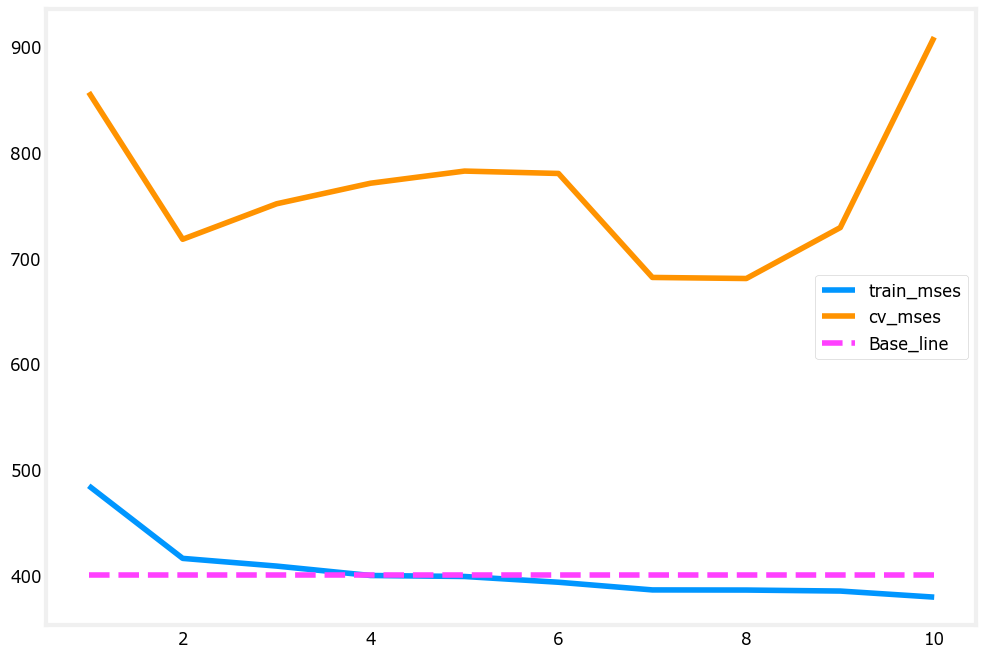

In [13]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
model = LinearRegression()
# scale, poly
train_mses = []
cv_mses = []
degrees = range(1,11)
for degree in degrees:
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    model.fit(x_train_mapped_scaled, y_train)
    y_hat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, y_hat)/2
    train_mses.append(train_mse)
    
    poly = PolynomialFeatures(degree, include_bias=False)
    x_cv_mapped = poly.fit_transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    y_hat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, y_hat)/2
    cv_mses.append(cv_mse)

    
plt.plot(degrees, train_mses, label = 'train_mses')
plt.plot(degrees, cv_mses, label = 'cv_mses')
plt.plot(degrees, np.repeat(400, len(degrees)), label='Base_line', linestyle = '--')
plt.legend()
plt.show()

In [27]:
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('/home/khalid/MyWork/Andrew-NG-ML/Course 2 Advanced-Learning-Algorithms/Week 3/work/data/c2w3_lab2_data4.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")


the shape of the training set (input) is: (600, 2)
the shape of the training set (target) is: (600,)

the shape of the cross validation set (input) is: (200, 2)
the shape of the cross validation set (target) is: (200,)

first 5 rows of the training inputs (2 features):
 [[2.63963964e+03 2.08208208e-01]
 [2.50750751e+03 5.86186186e+00]
 [1.59759760e+03 1.20120120e+00]
 [2.56456456e+03 5.92592593e-01]
 [2.24324324e+03 3.37937938e+00]]


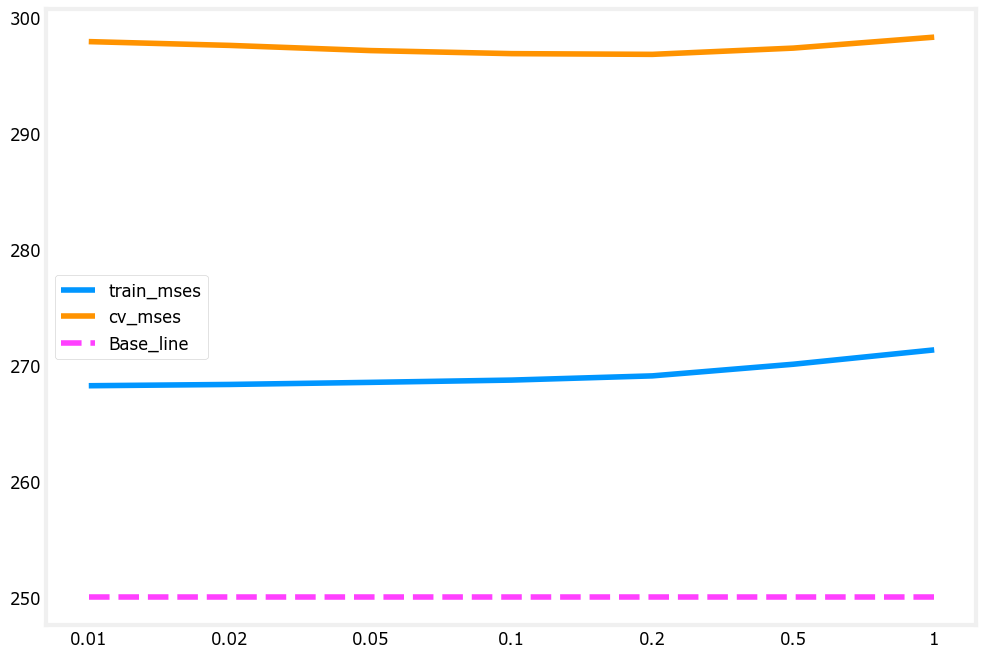

In [28]:
from sklearn.linear_model import Ridge


# scale, poly
train_mses = []
cv_mses = []
alphas = reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

for alpha in alphas:
    model = Ridge(alpha=alpha)
    poly = PolynomialFeatures(4, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    model.fit(x_train_mapped_scaled, y_train)
    y_hat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, y_hat)/2
    train_mses.append(train_mse)
    
    poly = PolynomialFeatures(4, include_bias=False)
    x_cv_mapped = poly.fit_transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    y_hat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, y_hat)/2
    cv_mses.append(cv_mse)

alphas = [str(x) for x in reg_params]  
plt.plot(alphas, train_mses, label = 'train_mses')
plt.plot(alphas, cv_mses, label = 'cv_mses')
plt.plot(alphas, np.repeat(250, len(alphas)), label='Base_line', linestyle = '--')
plt.legend()
plt.show()

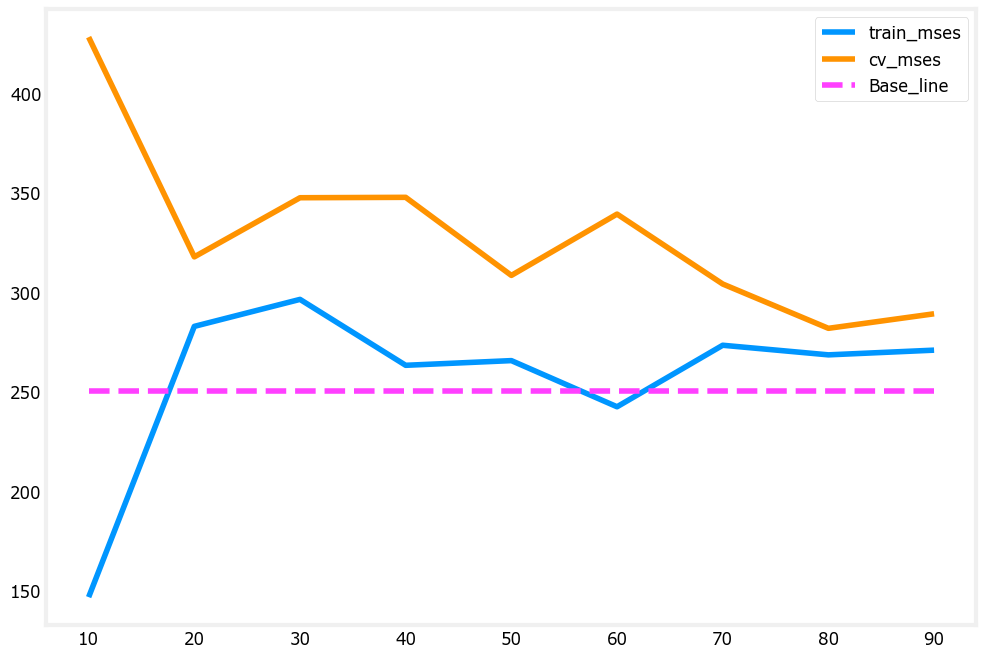

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('/home/khalid/MyWork/Andrew-NG-ML/Course 2 Advanced-Learning-Algorithms/Week 3/work/data/c2w3_lab2_data4.csv')

# scale, poly
train_mses = []
cv_mses = []
fractions = [10, 20, 30, 40, 50, 60, 70, 80, 90]

for fraction in fractions:
    num_samples_train, x_, y_train_sub, y_= train_test_split(x_train, y_train, train_size=fraction/100.0)
    del x_, y_
    model = LinearRegression()
    poly = PolynomialFeatures(4, include_bias=False)
    x_train_mapped = poly.fit_transform(num_samples_train)
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    model.fit(x_train_mapped_scaled, y_train_sub)
    y_hat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train_sub, y_hat)/2
    train_mses.append(train_mse)
    
    num_samples_cv, x_, y_train_cv_sub, y_ = train_test_split(x_cv, y_cv, train_size=fraction/100)
    del x_, y_
    poly = PolynomialFeatures(4, include_bias=False)
    x_cv_mapped = poly.fit_transform(num_samples_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    y_hat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_train_cv_sub, y_hat)/2
    cv_mses.append(cv_mse)

fractions = [str(x) for x in fractions]  
plt.plot(fractions, train_mses, label = 'train_mses')
plt.plot(fractions, cv_mses, label = 'cv_mses')
plt.plot(fractions, np.repeat(250, len(fractions)), label='Base_line', linestyle = '--')
plt.legend()
plt.show()